## <font color=blue>Jupyter Setup<font/>

###  Import required libraries:

In [1]:
import pandas as pd
import numpy as np
import math
from datetime import date, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', 600)

## <font color=blue>Data Load<font/>

### Load data:

In [3]:
h1 = pd.read_csv('H1_clean.csv')

In [7]:
#h2 = pd.read_csv('H2.csv')

### Preview data:

In [4]:
h1.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservedTypeEqualsAssigned,StaysInNights
0,0,7,2015,7,27,1,0,1,1,0,0,BB,NonPortugal,Direct,Direct,0,0,A,C,0,No Deposit,Unknown,Unknown,0,Transient,75.0,0,0,0,1
1,0,13,2015,7,27,1,0,1,1,0,0,BB,NonPortugal,Corporate,Corporate,0,0,A,A,0,No Deposit,Other,Unknown,0,Transient,75.0,0,0,1,1
2,0,14,2015,7,27,1,0,2,2,0,0,BB,NonPortugal,Online TA,TA/TO,0,0,A,A,0,No Deposit,240,Unknown,0,Transient,98.0,0,1,1,2
3,0,14,2015,7,27,1,0,2,2,0,0,BB,NonPortugal,Online TA,TA/TO,0,0,A,A,0,No Deposit,240,Unknown,0,Transient,98.0,0,1,1,2
4,0,0,2015,7,27,1,0,2,2,0,0,BB,Portugal,Direct,Direct,0,0,C,C,0,No Deposit,Unknown,Unknown,0,Transient,107.0,0,0,1,2


In [6]:
#h2.head()

## <font color=blue>Exploratory Data Analysis</font>

### Identify variables and variable Types:

In [5]:
h1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39453 entries, 0 to 39452
Data columns (total 30 columns):
IsCanceled                     39453 non-null int64
LeadTime                       39453 non-null int64
ArrivalDateYear                39453 non-null int64
ArrivalDateMonth               39453 non-null int64
ArrivalDateWeekNumber          39453 non-null int64
ArrivalDateDayOfMonth          39453 non-null int64
StaysInWeekendNights           39453 non-null int64
StaysInWeekNights              39453 non-null int64
Adults                         39453 non-null int64
Children                       39453 non-null int64
Babies                         39453 non-null int64
Meal                           39453 non-null object
Country                        39453 non-null object
MarketSegment                  39453 non-null object
DistributionChannel            39453 non-null object
IsRepeatedGuest                39453 non-null int64
PreviousBookingsNotCanceled    39453 non-null int64
Res

Upon inital inspection:

1. Only one variable has null values: **`Country`**

In [7]:
for col in h1.columns:
    
    if h1[col].dtype == 'O':
        
        print('categorical feature:\n'+ col)
        print('\nunique values:', h1[col].nunique())
        print('\nvalue counts:\n', h1[col].value_counts())
        print('\n')

categorical feature:
Meal

unique values: 5

value counts:
 BB           29564
HB            7946
Undefined     1158
FB             704
SC              81
Name: Meal, dtype: int64


categorical feature:
Country

unique values: 3

value counts:
 NonPortugal    21865
Portugal       17134
Unknown          454
Name: Country, dtype: int64


categorical feature:
MarketSegment

unique values: 6

value counts:
 Online TA        17529
Offline TA/TO     7349
Direct            6408
Groups            5719
Corporate         2247
Complementary      201
Name: MarketSegment, dtype: int64


categorical feature:
DistributionChannel

unique values: 3

value counts:
 TA/TO        28554
Direct        7742
Corporate     3157
Name: DistributionChannel, dtype: int64


categorical feature:
ReservedRoomType

unique values: 8

value counts:
 A                   22941
D                    7372
E                    4941
G                    1594
F                    1096
C                     909
H                

initial obseravtions:

**`Agent`** has 8,209 instances of 'NULL'
**`Company`** has 3,6952 instances of 'NULL'

In [8]:
# remove leading and laging whitespace from string variables

for col in h1.columns:
    
    if h1[col].dtype == 'O':
        
        h1[col] = h1[col].map(lambda x: str(x).strip())

In [9]:
# Replace the term 'NULL' with 'No Agent' 

h1.loc[h1['Agent'] == 'NULL', 'Agent'] = 'No Agent'

In [14]:
# Replace the term 'NULL' with 'No Company'

h1.loc[h1['Company'] == 'NULL', 'Company'] = 'No Company'

In [10]:
# Preview changes
h1.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservedTypeEqualsAssigned,StaysInNights
0,0,7,2015,7,27,1,0,1,1,0,0,BB,NonPortugal,Direct,Direct,0,0,A,C,0,No Deposit,Unknown,Unknown,0,Transient,75.0,0,0,0,1
1,0,13,2015,7,27,1,0,1,1,0,0,BB,NonPortugal,Corporate,Corporate,0,0,A,A,0,No Deposit,Other,Unknown,0,Transient,75.0,0,0,1,1
2,0,14,2015,7,27,1,0,2,2,0,0,BB,NonPortugal,Online TA,TA/TO,0,0,A,A,0,No Deposit,240,Unknown,0,Transient,98.0,0,1,1,2
3,0,14,2015,7,27,1,0,2,2,0,0,BB,NonPortugal,Online TA,TA/TO,0,0,A,A,0,No Deposit,240,Unknown,0,Transient,98.0,0,1,1,2
4,0,0,2015,7,27,1,0,2,2,0,0,BB,Portugal,Direct,Direct,0,0,C,C,0,No Deposit,Unknown,Unknown,0,Transient,107.0,0,0,1,2


In [11]:
def cont_cols(df):
    """For a given DataFrame: identify all columns that hold numeric data (with 15+ unique values)"""
    return ([col for col in df.columns if df[col].dtype in ['float64', 'int64'] and df[col].nunique() > 15])

def cat_cols(df):
    """For a given DataFrame: identify all columns that hold 15 or fewer unique values"""   
    return ([col for col in df.columns if df[col].nunique() <= 15])

In [12]:
cont_cols(h1)

['LeadTime',
 'ArrivalDateWeekNumber',
 'ArrivalDateDayOfMonth',
 'StaysInWeekendNights',
 'StaysInWeekNights',
 'PreviousBookingsNotCanceled',
 'DaysInWaitingList',
 'ADR',
 'StaysInNights']

In [18]:
# Replace the NaN terms with 'Unspecified' 

h1.loc[h1['Country'] == 'nan', 'Country'] = 'Unspecified'

In [13]:
def plot_dists(df, var_type = None, target = None):
    """ for a specified DataFrame state whether you want to plot continuous variables by passing 
        the argument: 'continuous' if so then the function will plot a distribution plot for each 
        numeric variable or a boxplot depending on whether you specify a target variable
        
        If var_type = None then the function will plot a barplot or a stacked barplot
        depending on whether you specify a target variable        
        """
    if var_type == 'continuous':
    
        numeric_columns = cont_cols(df)
    
        numeric_columns_count = len(numeric_columns)

        shape_dim = math.ceil(numeric_columns_count/4)
    
        df_cont = df[numeric_columns]
        fig2, axes2 = plt.subplots(shape_dim, 4, figsize = (20,10))
    
        for n in range(0, numeric_columns_count):
    
            i = df_cont.dtypes.index[n]
    
            row = (n)//4
            col = (n)%4
    
            ax = axes2[row][col]
            if target:
                sns.boxplot(x = target, y = i, data = df[numeric_columns + [target]], ax = ax)
                ax.set_title('{}'.format(i))
                plt.subplots_adjust(wspace=0.2, hspace=0.2);
            else:
                sns.kdeplot(df_cont[i], ax = ax)
                ax.set_title('{}'.format(i))
                plt.subplots_adjust(wspace=0.2, hspace=0.2);
            
    else:
        
        cat_columns = cat_cols(df)
    
        cat_columns_count = len(cat_columns)

        shape_dim = math.ceil(cat_columns_count/4)
    
        df_cat = df[cat_columns]

        fig2, axes2 = plt.subplots(shape_dim, 4, figsize = (30,30))
        
    
        for n in range(0, cat_columns_count):
    
            i = df_cat.dtypes.index[n]
            
            row = (n)//4
            col = (n)%4
    
            ax = axes2[row][col]
            if target:
                if i == target:
                    sns.countplot(x = i, data = df_cat, ax = ax)
                    ax.set_title('{}'.format(i))
                    plt.subplots_adjust(wspace=0.2, hspace=0.2);
                else:
                    df_plot = df.groupby([target, i]).size().reset_index().pivot(columns=target, index=i, values=0)
                    df_plot.plot(kind='bar', stacked=True, ax = ax)
                    ax.set_title('{}'.format(i))
                    plt.subplots_adjust(wspace=0.2, hspace=0.2);
            else:
                sns.countplot(x = i, data = df_cat, ax = ax)
                ax.set_title('{}'.format(i))
                plt.subplots_adjust(wspace=0.2, hspace=0.2);

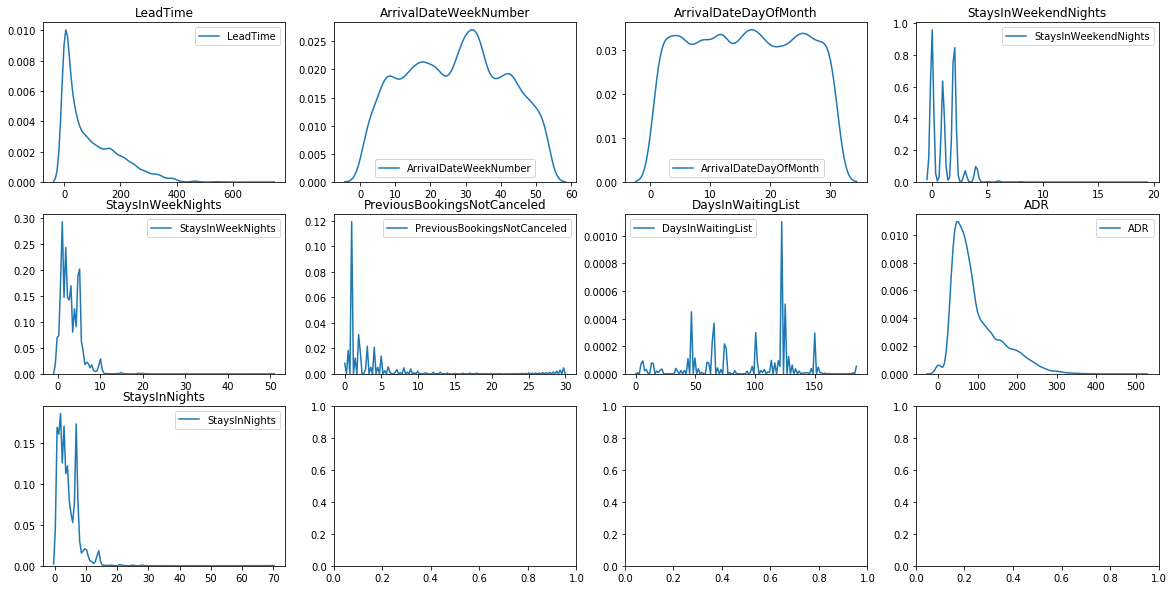

In [14]:
plot_dists(h1, var_type = 'continuous')

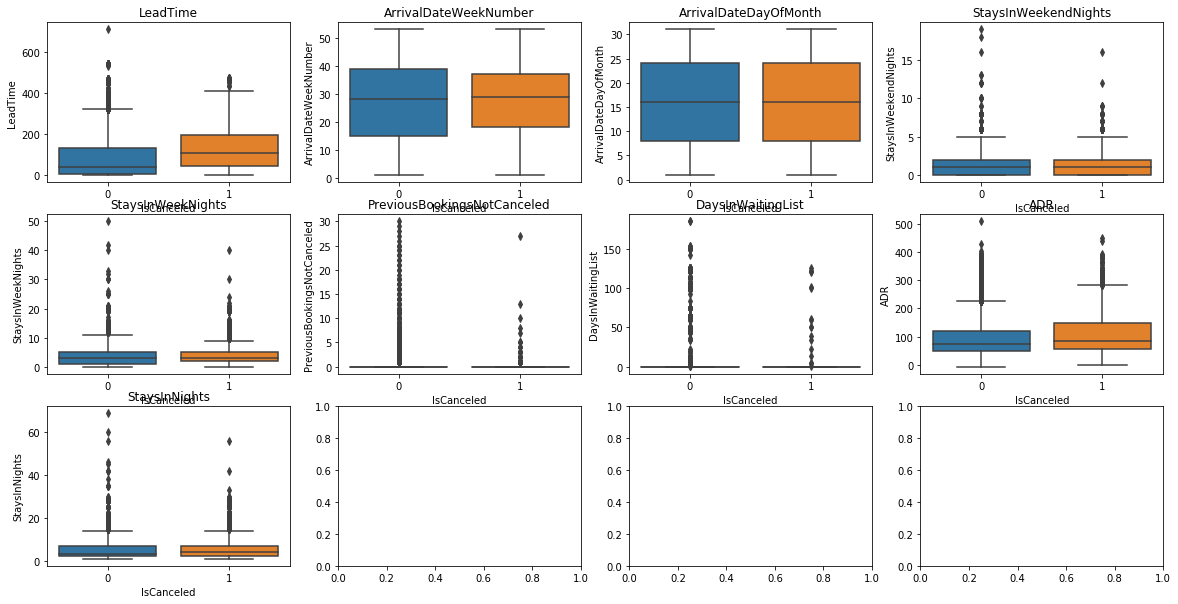

In [15]:
plot_dists(h1, var_type = 'continuous', target = 'IsCanceled')

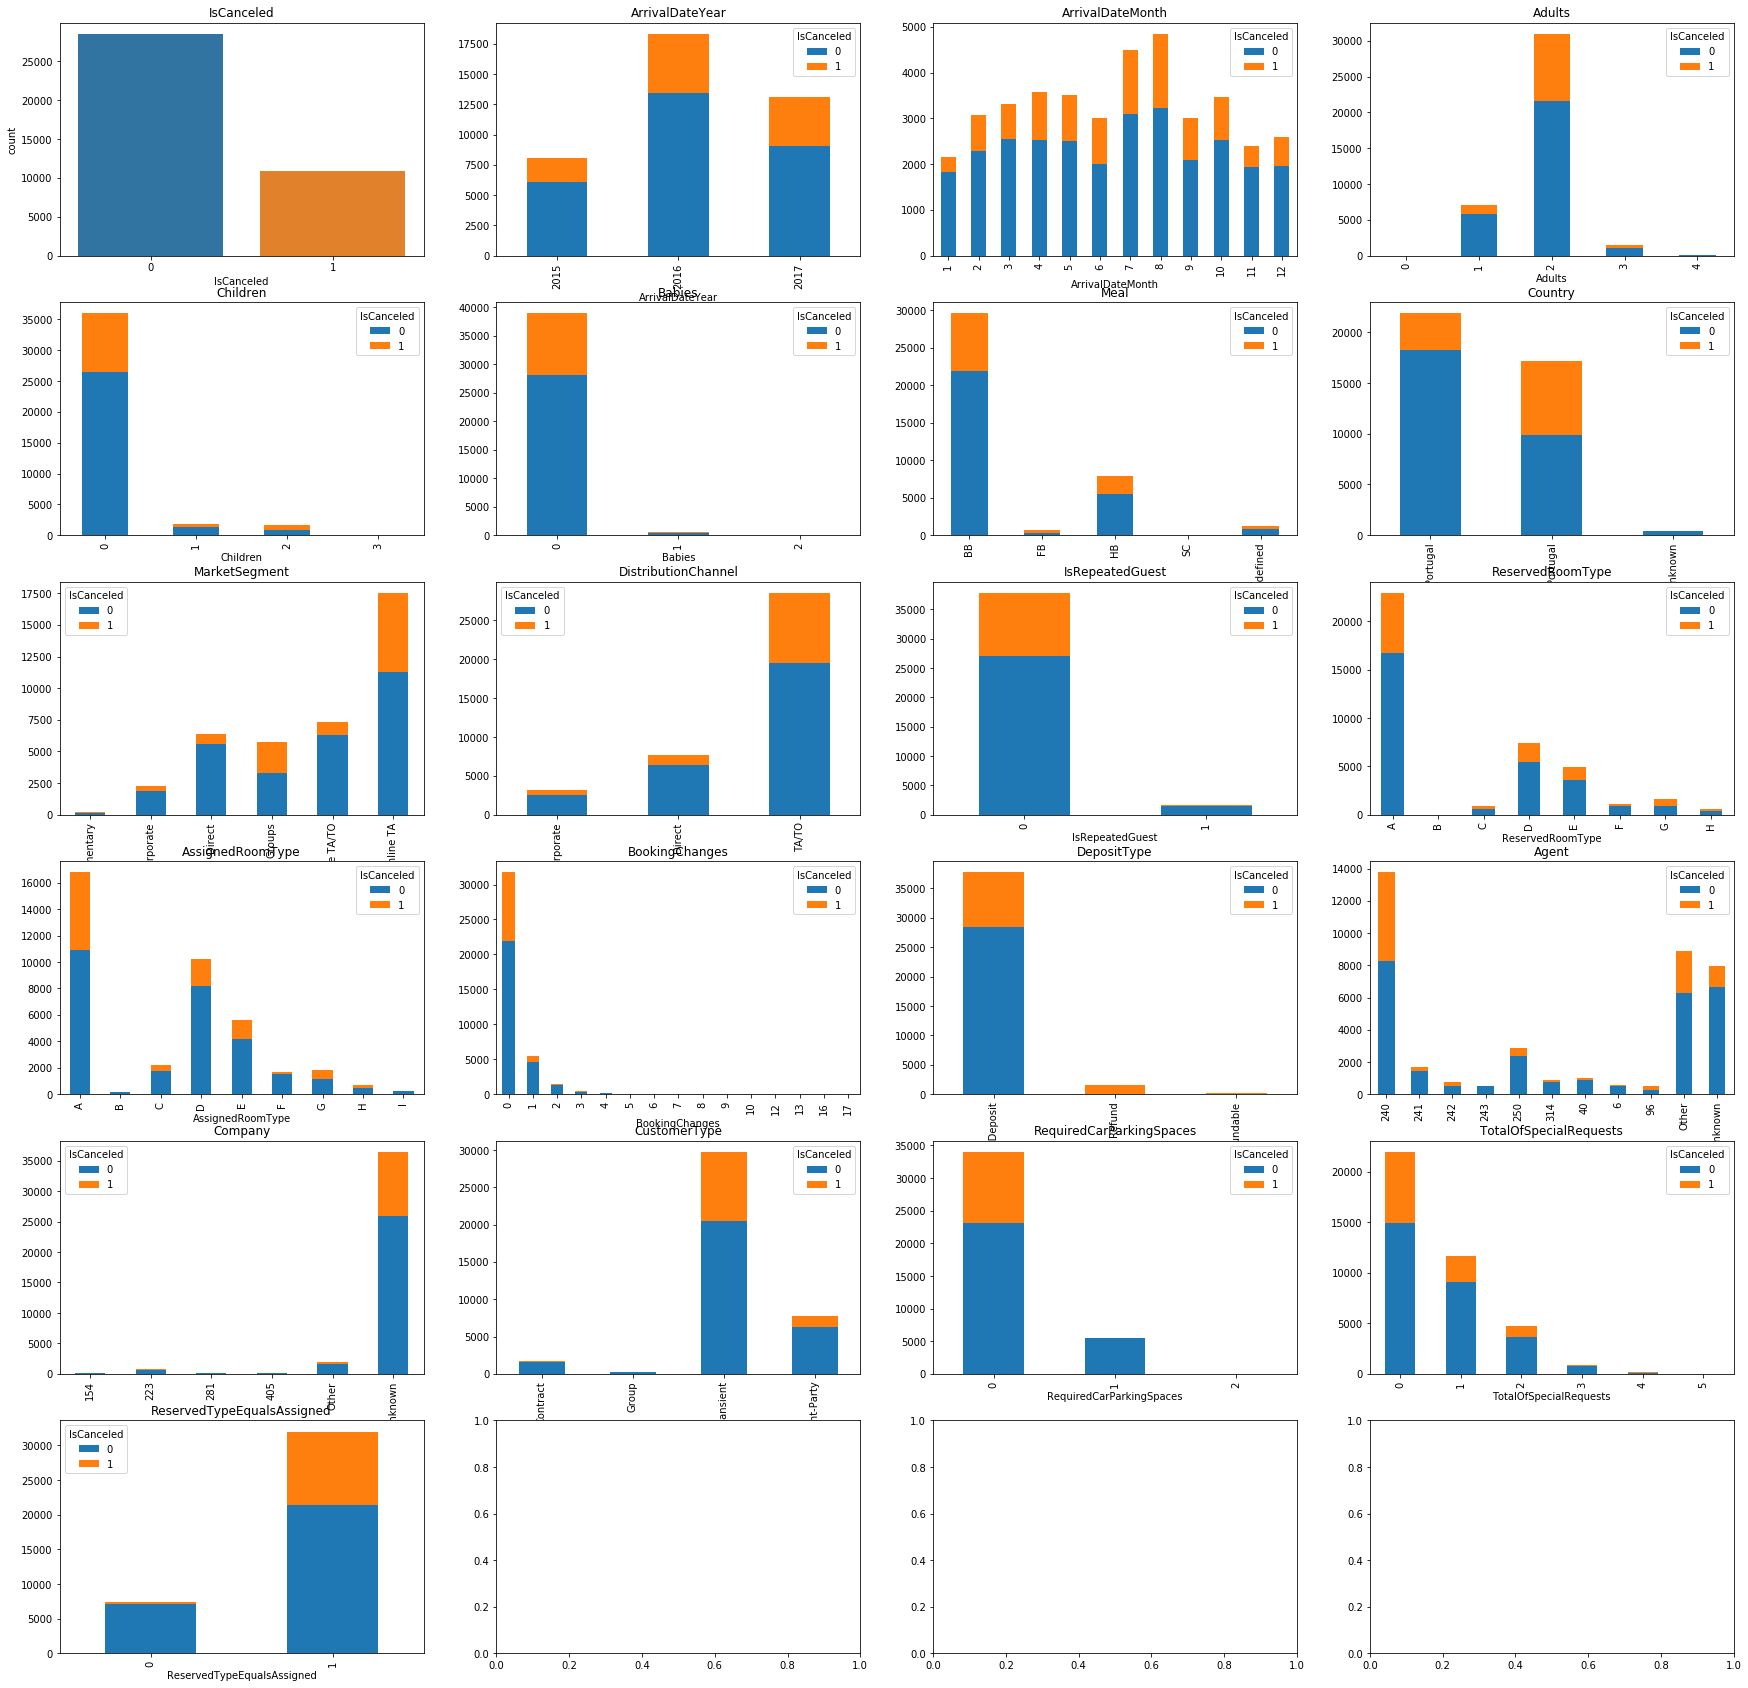

In [16]:
plot_dists(h1, var_type = 'categorical', target = 'IsCanceled')

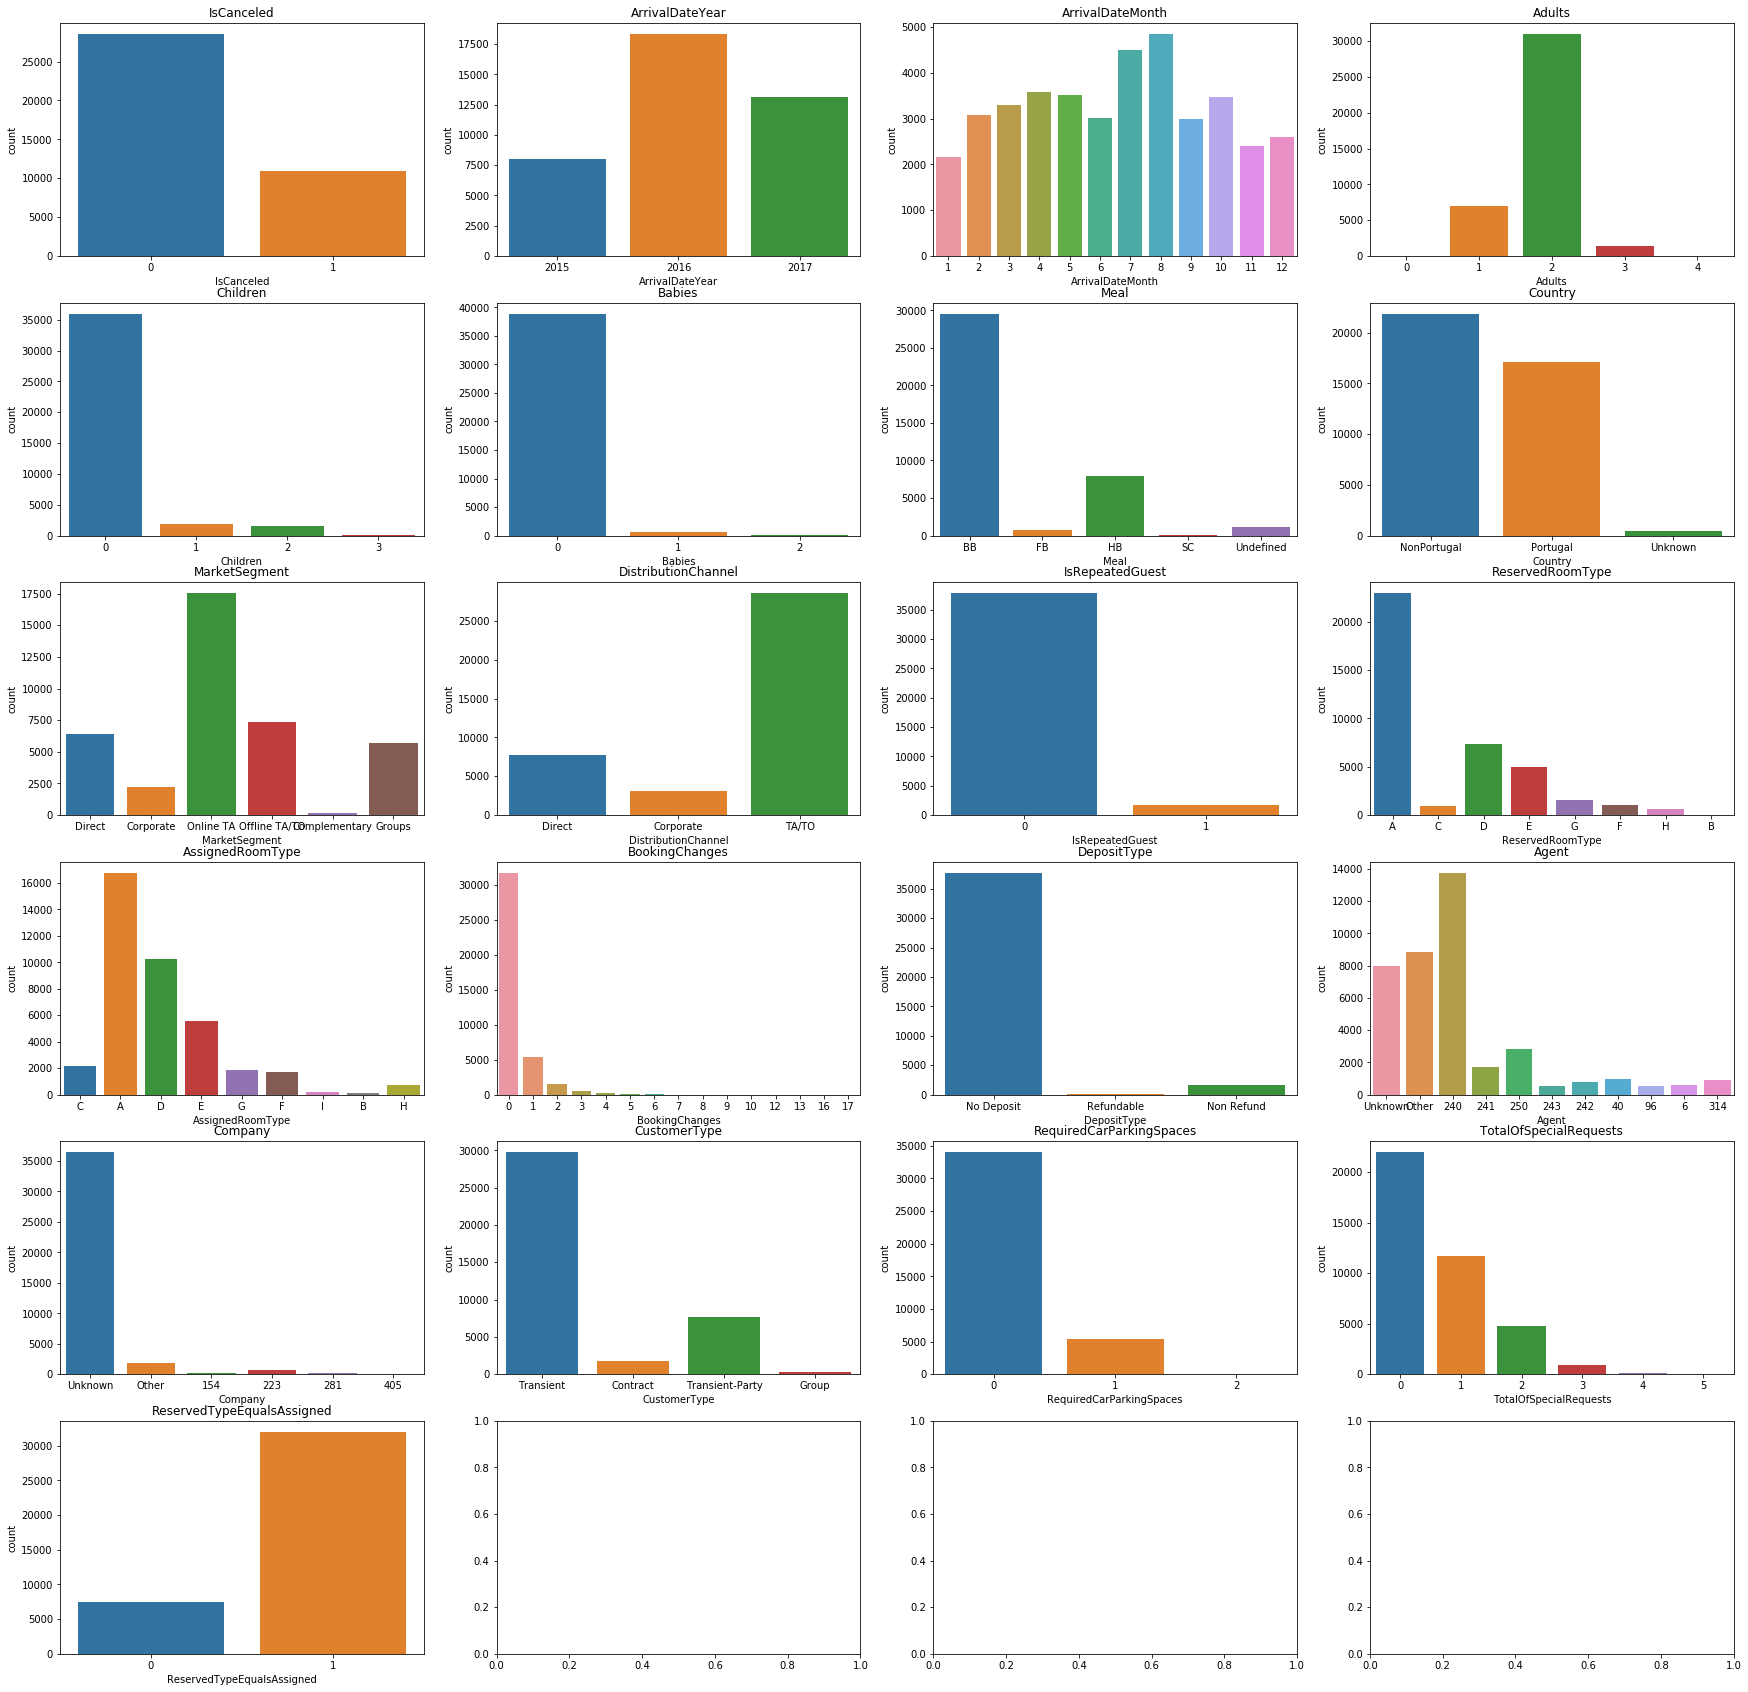

In [17]:
plot_dists(h1, var_type = 'categorical')

### Derive Variables

#### `day_of_week` and `quarter` derived from `date`

It would be useful to explor whether the time of year (quarter,  Month) or week (day) has any impact on the liklihood of a booking being canceled. Therefore the day and quarter will need to be extracted from the **`ArrivalDate`** column.

Month is already available within the data.

In [18]:
h1.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservedTypeEqualsAssigned,StaysInNights
0,0,7,2015,7,27,1,0,1,1,0,0,BB,NonPortugal,Direct,Direct,0,0,A,C,0,No Deposit,Unknown,Unknown,0,Transient,75.0,0,0,0,1
1,0,13,2015,7,27,1,0,1,1,0,0,BB,NonPortugal,Corporate,Corporate,0,0,A,A,0,No Deposit,Other,Unknown,0,Transient,75.0,0,0,1,1
2,0,14,2015,7,27,1,0,2,2,0,0,BB,NonPortugal,Online TA,TA/TO,0,0,A,A,0,No Deposit,240,Unknown,0,Transient,98.0,0,1,1,2
3,0,14,2015,7,27,1,0,2,2,0,0,BB,NonPortugal,Online TA,TA/TO,0,0,A,A,0,No Deposit,240,Unknown,0,Transient,98.0,0,1,1,2
4,0,0,2015,7,27,1,0,2,2,0,0,BB,Portugal,Direct,Direct,0,0,C,C,0,No Deposit,Unknown,Unknown,0,Transient,107.0,0,0,1,2


In [19]:
import datetime as dt

In [20]:
h1['ArrivalDateMonth'].unique()

array([ 7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6])

In [27]:
#month_conv = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
#              'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}

#month_conv_2 = {'January': '001_Jan', 'February': '002_Feb', 'March': '003_Mar', 'April': '004_Apr', 
#                'May': '005_May', 'June': '006_Jun', 'July': '007_Jul', 'August': '008_Aug', 'September': '009_Sept', 
#                'October': '010_Oct', 'November': '011_Nov', 'December': '012_Dec'}

In [22]:
month_conv_3 = {1: '001_Jan', 2: '002_Feb', 3: '003_Mar', 4: '004_Apr', 
                5: '005_May', 6: '006_Jun', 7: '007_Jul', 8: '008_Aug', 9: '009_Sept', 
                10: '010_Oct', 11: '011_Nov', 12: '012_Dec'}

In [37]:
#h1['ArrivalDateMonth_int'] = h1['ArrivalDateMonth'].map(lambda x: month_conv[x])

In [29]:
#h1['ArrivalDateMonth_abbr'] = h1['ArrivalDateMonth'].map(lambda x: month_conv_2[x])

In [36]:
#h1['arrivaldate'] = h1.apply(lambda x: dt.datetime(x['ArrivalDateYear'], x['ArrivalDateMonth_int'], x['ArrivalDateDayOfMonth']), axis = 1)

In [27]:
h1['arrivaldate'] = h1.apply(lambda x: dt.datetime(x['ArrivalDateYear'], x['ArrivalDateMonth'], x['ArrivalDateDayOfMonth']), axis = 1)

In [23]:
h1['ArrivalDateMonth_abbr'] = h1['ArrivalDateMonth'].map(lambda x: month_conv_3[x])

In [28]:
#   Useful to extract the day, month and quarter from the date variable:

h1['Arrival_day_of_week'] = h1['arrivaldate'].dt.dayofweek
h1['Arrival_quarter'] = h1['arrivaldate'].dt.quarter

In [29]:
h1['Arrival_quarter'].value_counts()

3    12341
2    10113
1     8533
4     8466
Name: Arrival_quarter, dtype: int64

In [33]:
#h1['Agent_flag'] = h1['Agent'].map(lambda x: 1 if x != 'No Agent' else 0)

In [34]:
#h1['Company_flag'] = h1['Company'].map(lambda x: 1 if x != 'No Company' else 0)

In [30]:
h1['Booking_Date'] = h1.apply(lambda x: x['arrivaldate'] - timedelta(x['LeadTime']), axis = 1)

In [31]:
h1.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservedTypeEqualsAssigned,StaysInNights,ArrivalDateMonth_abbr,arrivaldate,Arrival_day_of_week,Arrival_quarter,Booking_Date
0,0,7,2015,7,27,1,0,1,1,0,0,BB,NonPortugal,Direct,Direct,0,0,A,C,0,No Deposit,Unknown,Unknown,0,Transient,75.0,0,0,0,1,007_Jul,2015-07-01,2,3,2015-06-24
1,0,13,2015,7,27,1,0,1,1,0,0,BB,NonPortugal,Corporate,Corporate,0,0,A,A,0,No Deposit,Other,Unknown,0,Transient,75.0,0,0,1,1,007_Jul,2015-07-01,2,3,2015-06-18
2,0,14,2015,7,27,1,0,2,2,0,0,BB,NonPortugal,Online TA,TA/TO,0,0,A,A,0,No Deposit,240,Unknown,0,Transient,98.0,0,1,1,2,007_Jul,2015-07-01,2,3,2015-06-17
3,0,14,2015,7,27,1,0,2,2,0,0,BB,NonPortugal,Online TA,TA/TO,0,0,A,A,0,No Deposit,240,Unknown,0,Transient,98.0,0,1,1,2,007_Jul,2015-07-01,2,3,2015-06-17
4,0,0,2015,7,27,1,0,2,2,0,0,BB,Portugal,Direct,Direct,0,0,C,C,0,No Deposit,Unknown,Unknown,0,Transient,107.0,0,0,1,2,007_Jul,2015-07-01,2,3,2015-07-01


In [37]:
h1['Booking_Date'].value_counts()[:20]

2015-10-14    380
2015-01-01    342
2015-10-16    331
2015-01-02    302
2016-01-18    239
2016-02-03    175
2016-12-06    166
2017-02-23    161
2015-09-19    160
2017-01-10    160
2016-01-14    159
2015-11-26    155
2016-01-19    154
2016-01-06    153
2016-12-07    153
2016-01-13    152
2016-01-25    152
2017-01-24    151
2016-01-11    150
2016-01-15    148
Name: Booking_Date, dtype: int64

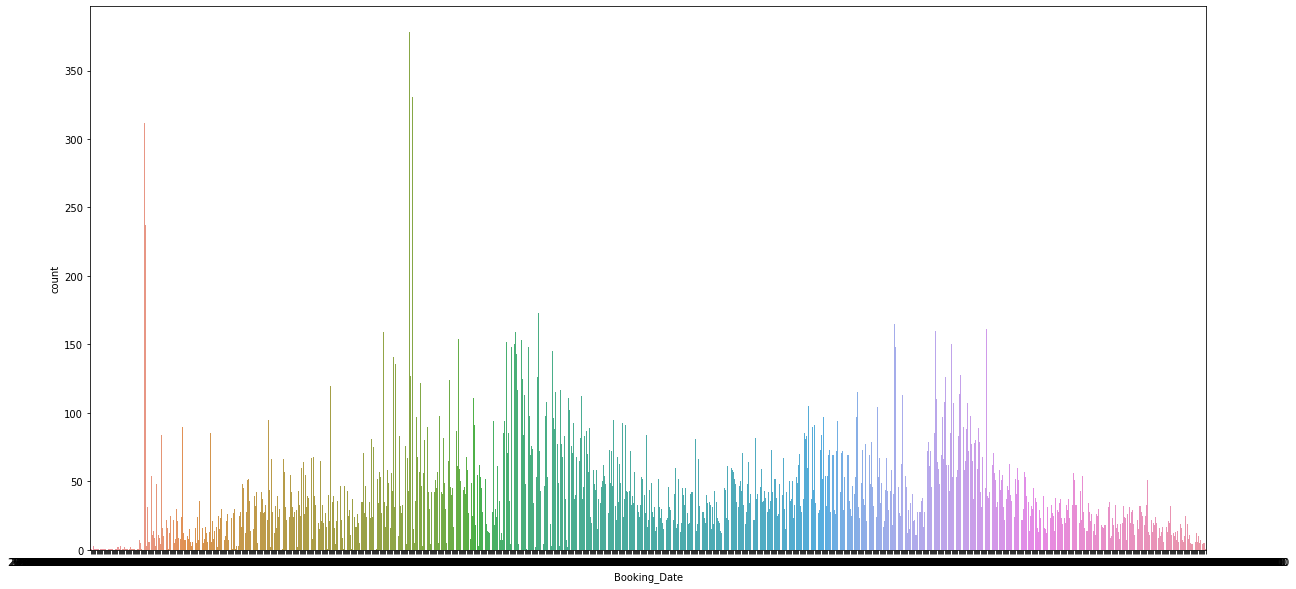

In [32]:
fig = plt.figure(figsize = (20, 10))
sns.countplot('Booking_Date', data = h1)

In [39]:
#   Useful to extract the day, month and quarter from the date variable:
h1['Booking_month'] = h1['Booking_Date'].dt.month.map(lambda x: month_conv_3[x])
h1['Booking_day_of_week'] = h1['Booking_Date'].dt.dayofweek
h1['Booking_quarter'] = h1['Booking_Date'].dt.quarter

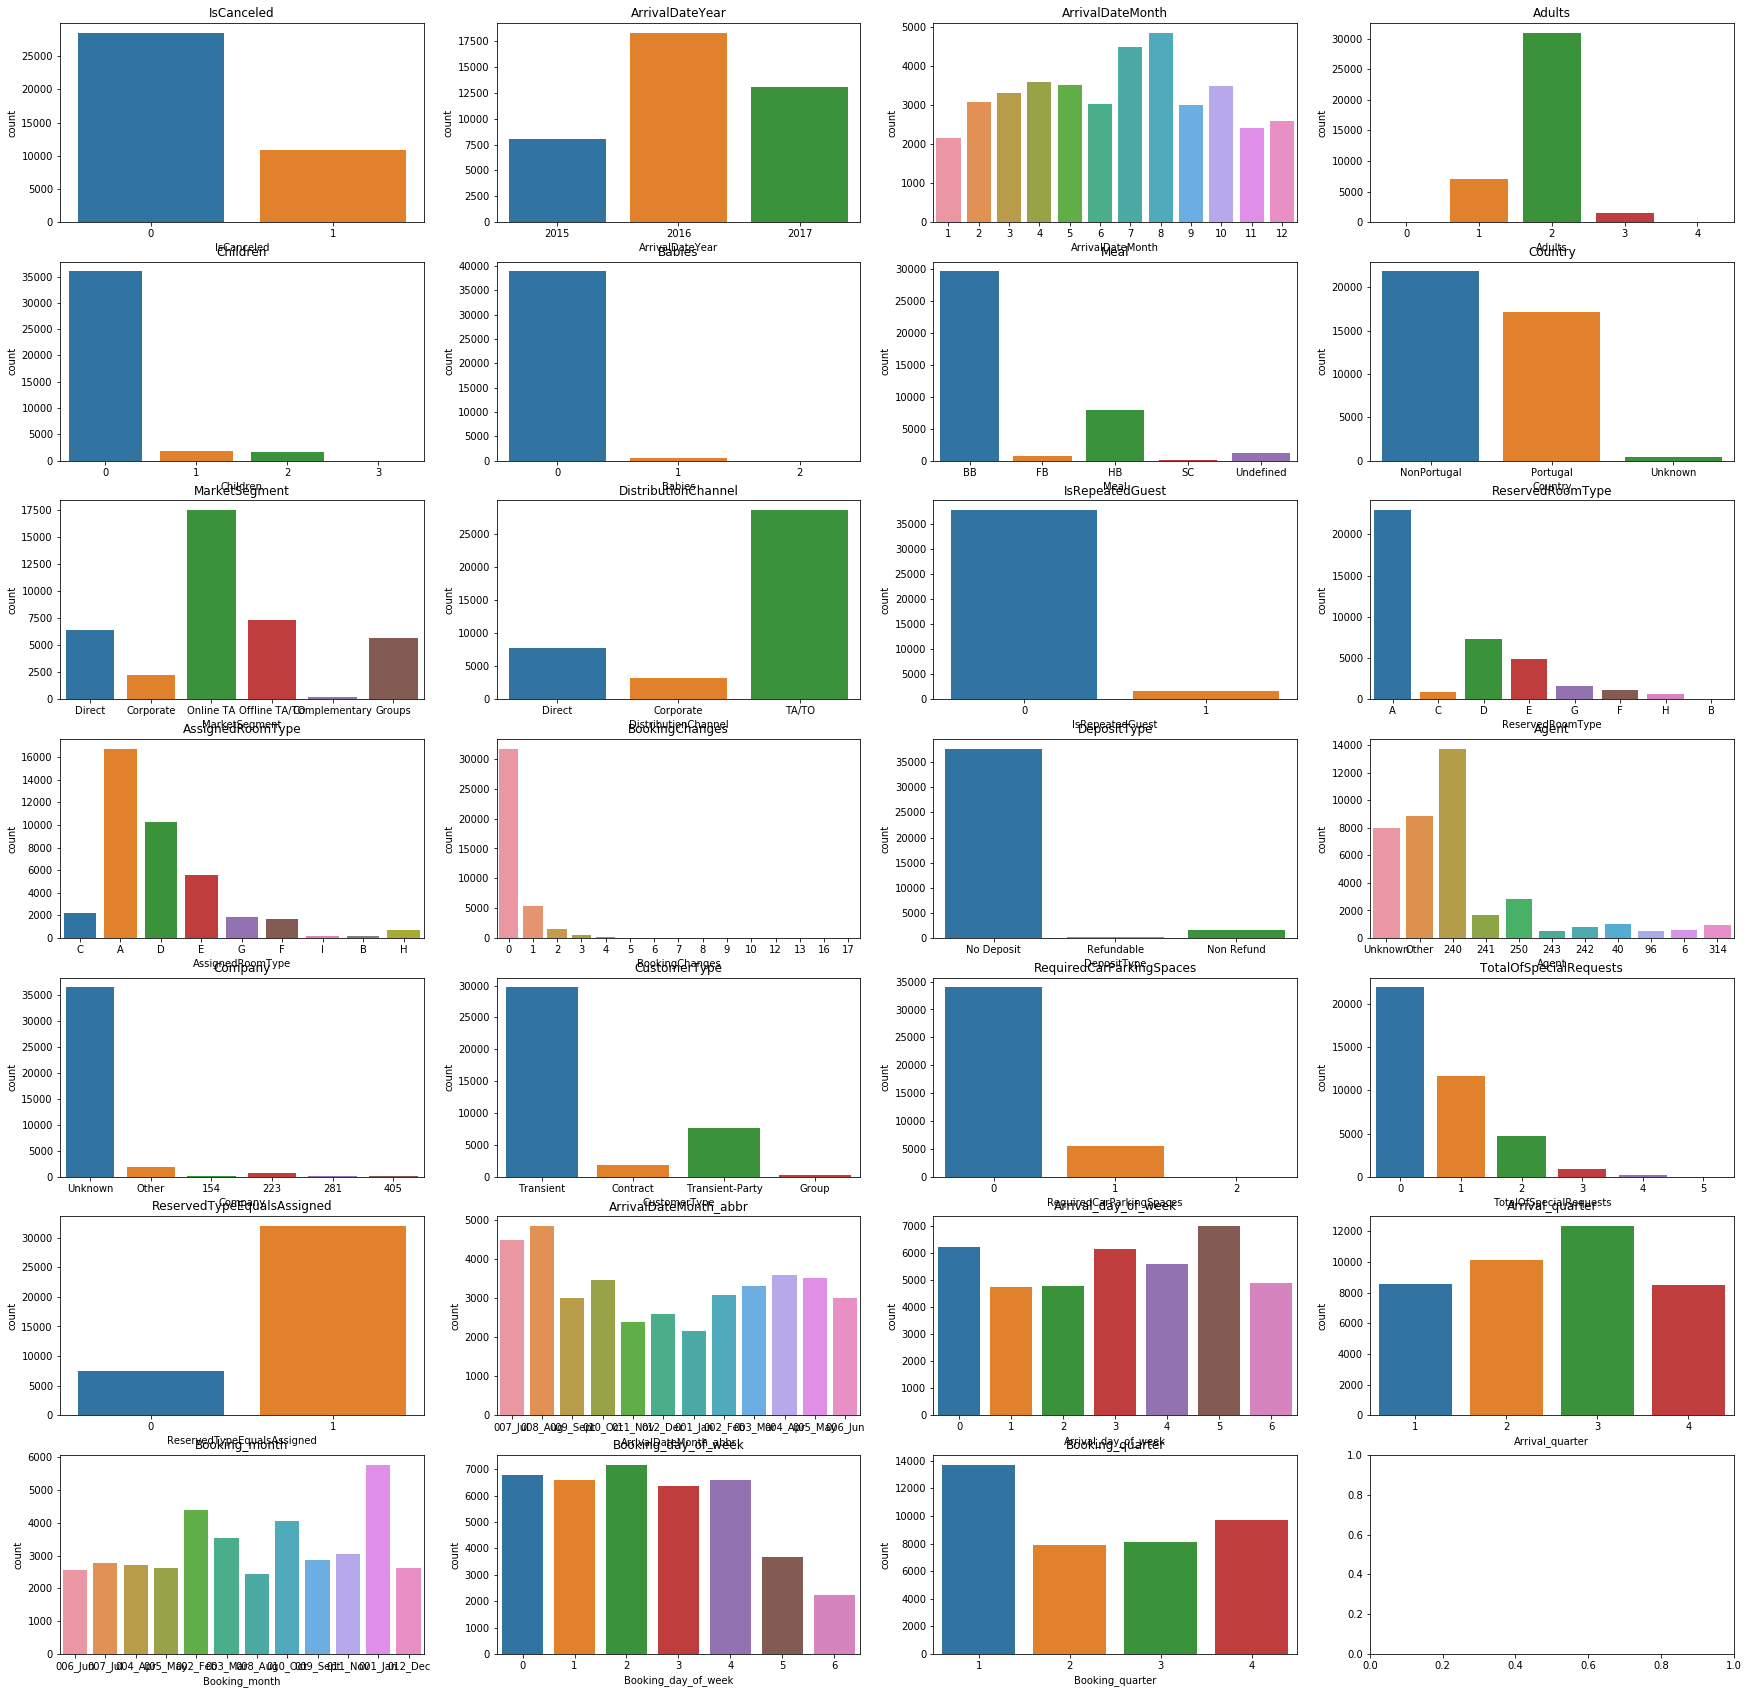

In [40]:
plot_dists(h1, var_type = 'categorical')

In [41]:
unique_counts = []
for col in h1.columns:
   unique_counts.append((col, h1[col].dtype, h1[col].nunique()))

In [42]:
sorted(unique_counts, key = lambda x: x[2], reverse = True)

[('ADR', dtype('float64'), 5877),
 ('Booking_Date', dtype('<M8[ns]'), 962),
 ('arrivaldate', dtype('<M8[ns]'), 793),
 ('LeadTime', dtype('int64'), 410),
 ('ArrivalDateWeekNumber', dtype('int64'), 53),
 ('DaysInWaitingList', dtype('int64'), 44),
 ('StaysInNights', dtype('int64'), 38),
 ('ArrivalDateDayOfMonth', dtype('int64'), 31),
 ('StaysInWeekNights', dtype('int64'), 31),
 ('PreviousBookingsNotCanceled', dtype('int64'), 31),
 ('StaysInWeekendNights', dtype('int64'), 16),
 ('BookingChanges', dtype('int64'), 15),
 ('ArrivalDateMonth', dtype('int64'), 12),
 ('ArrivalDateMonth_abbr', dtype('O'), 12),
 ('Booking_month', dtype('O'), 12),
 ('Agent', dtype('O'), 11),
 ('AssignedRoomType', dtype('O'), 9),
 ('ReservedRoomType', dtype('O'), 8),
 ('Arrival_day_of_week', dtype('int64'), 7),
 ('Booking_day_of_week', dtype('int64'), 7),
 ('MarketSegment', dtype('O'), 6),
 ('Company', dtype('O'), 6),
 ('TotalOfSpecialRequests', dtype('int64'), 6),
 ('Adults', dtype('int64'), 5),
 ('Meal', dtype('O')

In [44]:
import sklearn.preprocessing as preprocessing
from sklearn.model_selection import train_test_split
from scipy import stats

In [45]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from IPython.display import Image  
from sklearn.model_selection import KFold, cross_validate

In [47]:
#X = h1.drop(['IsCanceled', 'arrivaldate', 'Agent', 'Company', 'Country', 'ArrivalDateMonth_int', 'ReservationStatus', 'ArrivalDateMonth', 'Booking_Date'],  axis = 1)
#y = h1.loc[:, 'IsCanceled']

In [50]:
X = h1.drop(['IsCanceled', 'arrivaldate', 'Agent', 'Company', 'Country', 'ArrivalDateMonth', 'Booking_Date'],  axis = 1)
y = h1.loc[:, 'IsCanceled']

In [51]:
x_dum_logit = pd.get_dummies(X, drop_first=True, dtype=float)

In [52]:
x_dum_logit.head()

,LeadTime,ArrivalDateYear,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,IsRepeatedGuest,PreviousBookingsNotCanceled,BookingChanges,DaysInWaitingList,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservedTypeEqualsAssigned,StaysInNights,Arrival_day_of_week,Arrival_quarter,Booking_day_of_week,Booking_quarter,Meal_FB,Meal_HB,Meal_SC,Meal_Undefined,MarketSegment_Corporate,MarketSegment_Direct,MarketSegment_Groups,MarketSegment_Offline TA/TO,MarketSegment_Online TA,DistributionChannel_Direct,DistributionChannel_TA/TO,ReservedRoomType_B,ReservedRoomType_C,ReservedRoomType_D,ReservedRoomType_E,ReservedRoomType_F,ReservedRoomType_G,ReservedRoomType_H,AssignedRoomType_B,AssignedRoomType_C,AssignedRoomType_D,AssignedRoomType_E,AssignedRoomType_F,AssignedRoomType_G,AssignedRoomType_H,AssignedRoomType_I,DepositType_Non Refund,DepositType_Refundable,CustomerType_Group,CustomerType_Transient,CustomerType_Transient-Party,ArrivalDateMonth_abbr_002_Feb,ArrivalDateMonth_abbr_003_Mar,ArrivalDateMonth_abbr_004_Apr,ArrivalDateMonth_abbr_005_May,ArrivalDateMonth_abbr_006_Jun,ArrivalDateMonth_abbr_007_Jul,ArrivalDateMonth_abbr_008_Aug,ArrivalDateMonth_abbr_009_Sept,ArrivalDateMonth_abbr_010_Oct,ArrivalDateMonth_abbr_011_Nov,ArrivalDateMonth_abbr_012_Dec,Booking_month_002_Feb,Booking_month_003_Mar,Booking_month_004_Apr,Booking_month_005_May,Booking_month_006_Jun,Booking_month_007_Jul,Booking_month_008_Aug,Booking_month_009_Sept,Booking_month_010_Oct,Booking_month_011_Nov,Booking_month_012_Dec
0,7,2015,27,1,0,1,1,0,0,0,0,0,0,75.0,0,0,0,1,2,3,2,2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,13,2015,27,1,0,1,1,0,0,0,0,0,0,75.0,0,0,1,1,2,3,3,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,14,2015,27,1,0,2,2,0,0,0,0,0,0,98.0,0,1,1,2,2,3,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,14,2015,27,1,0,2,2,0,0,0,0,0,0,98.0,0,1,1,2,2,3,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,2015,27,1,0,2,2,0,0,0,0,0,0,107.0,0,0,1,2,2,3,2,3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [53]:
X_train, X_test, y_train, y_test = train_test_split(x_dum_logit, y, test_size = 0.3, random_state = 42)

In [55]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(27617, 75)
(27617,)
(11836, 75)
(11836,)


In [56]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.3, random_state = 42)

In [57]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(19331, 75)
(19331,)
(8286, 75)
(8286,)
(11836, 75)
(11836,)


In [213]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

In [214]:
smote = SMOTE()

In [61]:
print(X_train_resampled.shape)
print(y_train_resampled.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(27980, 75)
(27980,)
(8286, 75)
(8286,)
(11836, 75)
(11836,)


In [219]:
from sklearn.linear_model import LogisticRegression

In [239]:
crossvalidation = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

In [240]:
logreg = LogisticRegression(fit_intercept = True, C = 1e15, solver='saga', penalty = 'l1', max_iter = 100)

In [241]:
steps = [('o', smote), \
         ('model', logreg)]

In [242]:
pipeline = Pipeline(steps = steps)

In [243]:
%%time
logreg_base = cross_validate(pipeline, X_train, y_train, scoring=['accuracy', 'roc_auc'], cv=crossvalidation, return_train_score = True)

/Users/flatiron/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/flatiron/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/flatiron/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/flatiron/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


CPU times: user 15.9 s, sys: 292 ms, total: 16.2 s
Wall time: 14.7 s


/Users/flatiron/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [244]:
#baseline_accuracy_train = np.mean(logreg_base['train_score'])
#baseline_accuracy_test = np.mean(logreg_base['test_score'])

baseline_accuracy_train = np.mean(logreg_base['train_accuracy'])
baseline_accuracy_validation = np.mean(logreg_base['test_accuracy'])

baseline_AUC_train = np.mean(logreg_base['train_roc_auc'])
baseline_AUC_validation = np.mean(logreg_base['test_roc_auc'])

In [245]:
print('baseline_accuracy_train:', round(baseline_accuracy_train, 4))
print('baseline_accuracy_validation:', round(baseline_accuracy_validation, 4))

print('baseline_AUC_train:', round(baseline_AUC_train, 4))
print('baseline_AUC_validation:' , round(baseline_AUC_validation, 4))

baseline_accuracy_train: 0.6652
baseline_accuracy_validation: 0.6648
baseline_AUC_train: 0.6968
baseline_AUC_validation: 0.6956


In [246]:
from scipy import interp
from itertools import cycle

/Users/flatiron/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/flatiron/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/flatiron/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/flatiron/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/flatiron/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:3

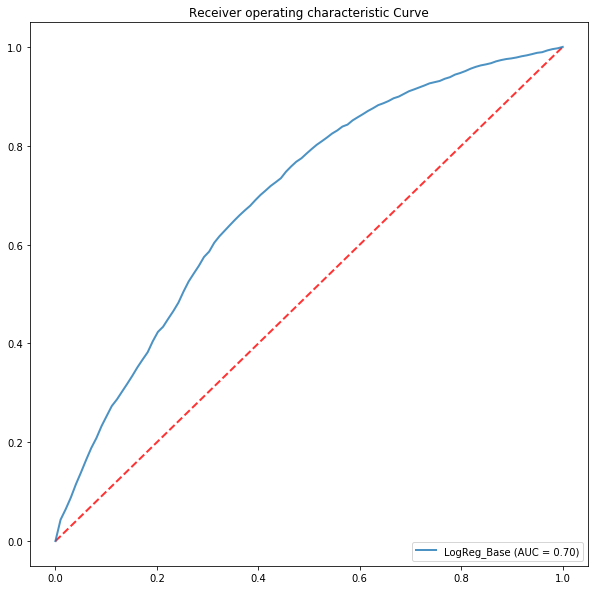

In [301]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize = (10, 10))
for i, (train, test) in enumerate(crossvalidation.split(X_train, y_train)):
    X_train_over, y_train_over = smote.fit_sample(X_train.iloc[train], y_train.iloc[train]) 
    lf = logreg.fit(X_train_over, y_train_over)
    probas_ = lf.predict_proba(X_train.iloc[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_train.iloc[test], probas_[:, 1])
    interp_tpr = interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(auc(fpr, tpr))

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr,
        label=r'LogReg_Base (AUC = %0.2f)' % (mean_auc),
        lw=2, alpha=.8)


ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic Curve")
ax.legend(loc="lower right")
plt.show()

In [295]:
X_train_over, y_train_over = smote.fit_sample(X_train, y_train) 
lf = logreg.fit(X_train_over, y_train_over)
probas_val = lf.predict_proba(X_val)

fpr, tpr, thresholds = roc_curve(y_val, probas_val[:, 1])
auc(fpr, tpr)

/Users/flatiron/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.7021120788937759

In [309]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate, StratifiedKFold, KFold

In [366]:
logreg_gs = LogisticRegression(fit_intercept = True, max_iter = 100)

In [376]:
steps = [('sampling', smote), \
         ('classification', logreg_gs)]

In [377]:
logreg_param_grid = {"classification__solver": ['saga', 'liblinear'],
                     "classification__penalty": ["l1", "l2"],
                 "classification__C": [0.1, 0.2, 0.3, 0.5, 0.5, 0.8, 1.0, 1e15, 5e15]
                }

In [378]:
pipeline = Pipeline(steps = steps)

In [379]:
logreg_grid_search = GridSearchCV(pipeline, param_grid = logreg_param_grid, cv = crossvalidation, return_train_score=True)

In [380]:
%%time
logreg_grid_search.fit(X_train, y_train)

/Users/flatiron/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/flatiron/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/flatiron/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/flatiron/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/flatiron/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:3

/Users/flatiron/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/flatiron/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/flatiron/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/flatiron/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/flatiron/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceW

/Users/flatiron/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/flatiron/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/flatiron/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/flatiron/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/flatiron/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: Conv

/Users/flatiron/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/flatiron/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/flatiron/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/flatiron/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/flatiron/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed

CPU times: user 24min 47s, sys: 19 s, total: 25min 6s
Wall time: 26min 18s


/Users/flatiron/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('sampling',
                                        SMOTE(k_neighbors=5, n_jobs=None,
                                              random_state=None,
                                              sampling_strategy='auto')),
                                       ('classification',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=1...
      

In [381]:
logreg_gs_training_score =  np.mean(logreg_grid_search.cv_results_['mean_train_score'])
logreg_gs_validation_score =  np.mean(logreg_grid_search.cv_results_['mean_test_score'])

In [382]:
logreg_gs_best_params = logreg_grid_search.best_params_

In [383]:
print(f"Mean Training Score: {logreg_gs_training_score :.2%}")
print(f"Mean Validation Score: {logreg_gs_validation_score :.2%}")
print("Best Parameter Combination Found During Grid Search\n", logreg_gs_best_params)

Mean Training Score: 72.07%
Mean Validation Score: 71.90%
Best Parameter Combination Found During Grid Search
 {'classification__C': 1000000000000000.0, 'classification__penalty': 'l2', 'classification__solver': 'liblinear'}


In [385]:
logreg_grid_search.score(X_val, y_val)

0.7752836109099687

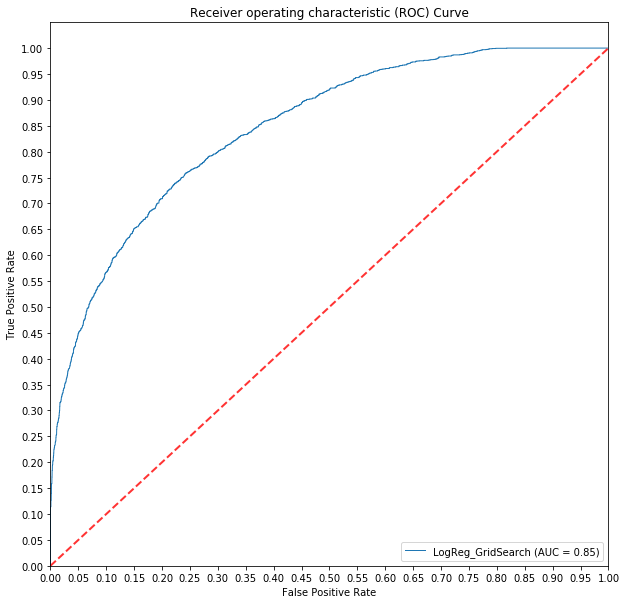

In [501]:
fig, ax = plt.subplots(figsize = (10, 10))
plot_roc_curve(logreg_grid_search, X_val, y_val,
                         name='LogReg_GridSearch',
                         lw=1, ax=ax)
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_yticks([i/20.0 for i in range(21)])
ax.set_xticks([i/20.0 for i in range(21)])
ax.set_title('Receiver operating characteristic (ROC) Curve')
ax.legend(loc='lower right')
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

In [387]:
X_dum = pd.get_dummies(X)

In [388]:
X_dum.head()

,LeadTime,ArrivalDateYear,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,IsRepeatedGuest,PreviousBookingsNotCanceled,BookingChanges,DaysInWaitingList,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservedTypeEqualsAssigned,StaysInNights,Arrival_day_of_week,Arrival_quarter,Booking_day_of_week,Booking_quarter,Meal_BB,Meal_FB,Meal_HB,Meal_SC,Meal_Undefined,MarketSegment_Complementary,MarketSegment_Corporate,MarketSegment_Direct,MarketSegment_Groups,MarketSegment_Offline TA/TO,MarketSegment_Online TA,DistributionChannel_Corporate,DistributionChannel_Direct,DistributionChannel_TA/TO,ReservedRoomType_A,ReservedRoomType_B,ReservedRoomType_C,ReservedRoomType_D,ReservedRoomType_E,ReservedRoomType_F,ReservedRoomType_G,ReservedRoomType_H,AssignedRoomType_A,AssignedRoomType_B,AssignedRoomType_C,AssignedRoomType_D,AssignedRoomType_E,AssignedRoomType_F,AssignedRoomType_G,AssignedRoomType_H,AssignedRoomType_I,DepositType_No Deposit,DepositType_Non Refund,DepositType_Refundable,CustomerType_Contract,CustomerType_Group,CustomerType_Transient,CustomerType_Transient-Party,ArrivalDateMonth_abbr_001_Jan,ArrivalDateMonth_abbr_002_Feb,ArrivalDateMonth_abbr_003_Mar,ArrivalDateMonth_abbr_004_Apr,ArrivalDateMonth_abbr_005_May,ArrivalDateMonth_abbr_006_Jun,ArrivalDateMonth_abbr_007_Jul,ArrivalDateMonth_abbr_008_Aug,ArrivalDateMonth_abbr_009_Sept,ArrivalDateMonth_abbr_010_Oct,ArrivalDateMonth_abbr_011_Nov,ArrivalDateMonth_abbr_012_Dec,Booking_month_001_Jan,Booking_month_002_Feb,Booking_month_003_Mar,Booking_month_004_Apr,Booking_month_005_May,Booking_month_006_Jun,Booking_month_007_Jul,Booking_month_008_Aug,Booking_month_009_Sept,Booking_month_010_Oct,Booking_month_011_Nov,Booking_month_012_Dec
0,7,2015,27,1,0,1,1,0,0,0,0,0,0,75.0,0,0,0,1,2,3,2,2,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,13,2015,27,1,0,1,1,0,0,0,0,0,0,75.0,0,0,1,1,2,3,3,2,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,14,2015,27,1,0,2,2,0,0,0,0,0,0,98.0,0,1,1,2,2,3,2,2,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,14,2015,27,1,0,2,2,0,0,0,0,0,0,98.0,0,1,1,2,2,3,2,2,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,2015,27,1,0,2,2,0,0,0,0,0,0,107.0,0,0,1,2,2,3,2,3,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [389]:
X_train2 = X_dum.loc[[x for x in list(X_train.index)],:]
y_train2 = y.loc[[x for x in list(y_train.index)]]
X_val2 = X_dum.loc[[x for x in list(X_val.index)],:]
y_val2 = y.loc[[x for x in list(y_val.index)]]
X_test2 = X_dum.loc[[x for x in list(X_test.index)],:]
y_test2 = y.loc[[x for x in list(y_test.index)]]

In [427]:
tree_clf = DecisionTreeClassifier(random_state=10, criterion = 'gini', max_depth = 5)

In [428]:
steps = [('o', smote), \
         ('model', tree_clf)]

In [429]:
pipeline = Pipeline(steps = steps)

In [430]:
%%time
tree_clf_base = cross_validate(pipeline, X_train2, y_train2, scoring=['accuracy', 'roc_auc'], cv=crossvalidation, return_train_score = True, return_estimator = True)

CPU times: user 2.52 s, sys: 179 ms, total: 2.7 s
Wall time: 1.74 s


In [431]:
tree_clf_base_accuracy_train = np.mean(tree_clf_base['train_accuracy'])
tree_clf_base_accuracy_val = np.mean(tree_clf_base['test_accuracy'])

tree_clf_base_AUC_train = np.mean(tree_clf_base['train_roc_auc'])
tree_clf_base_AUC_val = np.mean(tree_clf_base['test_roc_auc'])

In [432]:
print('baseline_accuracy_train:', round(tree_clf_base_accuracy_train, 4))
print('baseline_accuracy_test:', round(tree_clf_base_accuracy_val, 4))

print('baseline_AUC_train:', round(tree_clf_base_AUC_train, 4))
print('baseline_AUC_test:' , round(tree_clf_base_AUC_val, 4))

baseline_accuracy_train: 0.7485
baseline_accuracy_test: 0.7461
baseline_AUC_train: 0.8177
baseline_AUC_test: 0.8147


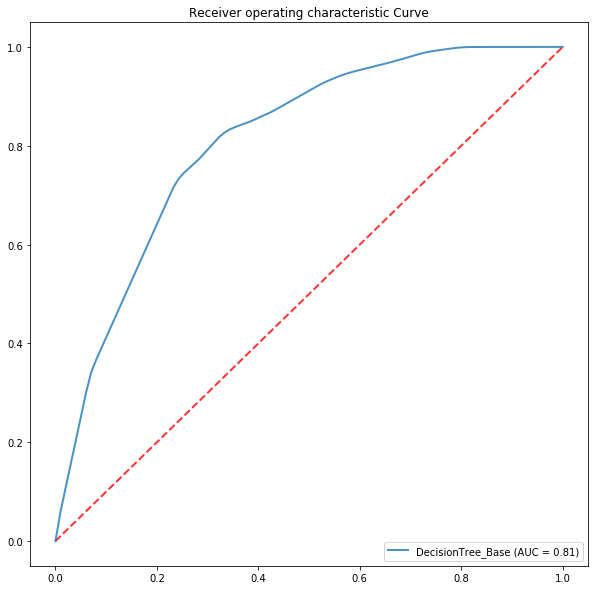

In [433]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize = (10, 10))
for i, (train, test) in enumerate(crossvalidation.split(X_train2, y_train2)):
    X_train_over, y_train_over = smote.fit_sample(X_train2.iloc[train], y_train2.iloc[train]) 
    lf = tree_clf.fit(X_train_over, y_train_over)
    probas_ = lf.predict_proba(X_train2.iloc[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_train.iloc[test], probas_[:, 1])
    interp_tpr = interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(auc(fpr, tpr))

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr,
        label=r'DecisionTree_Base (AUC = %0.2f)' % (mean_auc),
        lw=2, alpha=.8)


ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic Curve")
ax.legend(loc="lower right")
plt.show()

In [452]:
def create_importance_df(tree_model, feature_data):
    feature_i = pd.DataFrame(tree_model.feature_importances_,
                             index = feature_data.columns,
                             columns=['importance']).sort_values('importance', ascending=False)

    feature_i = feature_i.loc[feature_i['importance'] > 0]
    
    return feature_i

In [458]:
tree_gs = DecisionTreeClassifier(random_state=10)

In [459]:
steps = [('sampling', smote), \
         ('classification', tree_gs)]

In [476]:
tree_param_grid = {"classification__criterion": ["gini", "entropy"],
                 #"classification__max_depth": [None, 2, 3, 4, 5, 6],
                 #"classification__min_samples_split": [2, 5, 10],
                 "classification__min_samples_leaf": [1, 2, 3, 4, 5, 6]}

In [477]:
pipeline = Pipeline(steps = steps)

In [478]:
crossvalidation_tree = KFold(n_splits=5, shuffle=True, random_state=1)

In [479]:
tree_grid_search = GridSearchCV(pipeline, tree_param_grid, cv = crossvalidation_tree, return_train_score=True, scoring = ['accuracy', 'roc_auc'], refit = 'roc_auc')

In [480]:
%%time
tree_grid_search.fit(X_train2, y_train2)

CPU times: user 41.3 s, sys: 2.13 s, total: 43.4 s
Wall time: 31.7 s


GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('sampling',
                                        SMOTE(k_neighbors=5, n_jobs=None,
                                              random_state=None,
                                              sampling_strategy='auto')),
                                       ('classification',
                                        DecisionTreeClassifier(ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features=None,
                                                               max_leaf_nodes=None,
                                                   

In [486]:
# Mean training score
dt_gs_training_score =  np.mean(tree_grid_search.cv_results_['mean_train_accuracy'])
dt_gs_validation_score =  np.mean(tree_grid_search.cv_results_['mean_test_accuracy'])

#   Best Parameter Combination
dt_gs_best_params = tree_grid_search.best_params_

print(f"Mean Training Score: {dt_gs_training_score :.2%}")
print(f"Mean Validation Score: {dt_gs_validation_score :.2%}")
print("Best Parameter Combination Found During Grid Search\n", dt_gs_best_params)

Mean Training Score: 94.29%
Mean Validation Score: 80.16%
Best Parameter Combination Found During Grid Search
 {'classification__criterion': 'gini', 'classification__min_samples_leaf': 6}


In [91]:
# OVERFIT!!
# try again hyper tuning

In [488]:
tree_gs_2 = DecisionTreeClassifier(random_state=10)

In [489]:
steps = [('sampling', smote), \
         ('classification', tree_gs_2)]

In [490]:
tree_param_grid_2 = {"classification__max_depth": [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
                     }

In [491]:
pipeline = Pipeline(steps = steps)

In [506]:
tree_grid_search_2 = GridSearchCV(pipeline, tree_param_grid_2, cv = crossvalidation_tree, return_train_score=True, scoring = ['accuracy', 'roc_auc'], refit = 'accuracy')

In [507]:
%%time
tree_grid_search_2.fit(X_train2, y_train2)

CPU times: user 32.6 s, sys: 2.27 s, total: 34.9 s
Wall time: 24.9 s


GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('sampling',
                                        SMOTE(k_neighbors=5, n_jobs=None,
                                              random_state=None,
                                              sampling_strategy='auto')),
                                       ('classification',
                                        DecisionTreeClassifier(ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features=None,
                                                               max_leaf_nodes=None,
                                                   

In [508]:
# Mean scores
dt_gs_training_accuracy_2 =  np.mean(tree_grid_search_2.cv_results_['mean_train_accuracy'])
dt_gs_validation_accuracy_2 =  np.mean(tree_grid_search_2.cv_results_['mean_test_accuracy'])

dt_gs_training_auc_2 =  np.mean(tree_grid_search_2.cv_results_['mean_train_roc_auc'])
dt_gs_validation_auc_2 =  np.mean(tree_grid_search_2.cv_results_['mean_test_roc_auc'])



#   Best Parameter Combination
dt_gs_best_params_2 = tree_grid_search_2.best_params_

print(f"Mean Training Accuracy: {dt_gs_training_accuracy_2 :.2%}")
print(f"Mean validation Accuracy: {dt_gs_validation_accuracy_2 :.2%}")
print(f"Mean Training AUC: {dt_gs_training_auc_2 :.2%}")
print(f"Mean validation AUC: {dt_gs_validation_auc_2 :.2%}")
print("Best Parameter Combination Found During Grid Search\n", dt_gs_best_params_2)

Mean Training Accuracy: 76.12%
Mean validation Accuracy: 74.60%
Mean Training AUC: 83.94%
Mean validation AUC: 81.61%
Best Parameter Combination Found During Grid Search
 {'classification__max_depth': 11}


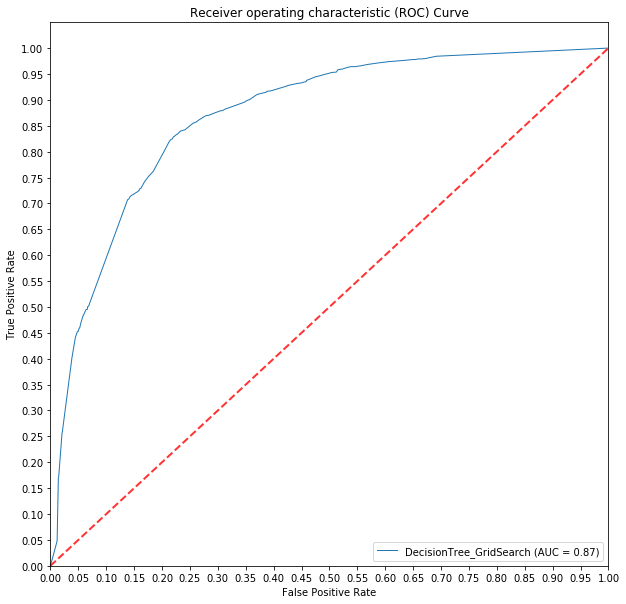

In [512]:
fig, ax = plt.subplots(figsize = (10, 10))
plot_roc_curve(tree_grid_search_2, X_val2, y_val2,
                         name='DecisionTree_GridSearch',
                         lw=1, ax=ax)
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_yticks([i/20.0 for i in range(21)])
ax.set_xticks([i/20.0 for i in range(21)])
ax.set_title('Receiver operating characteristic (ROC) Curve')
ax.legend(loc='lower right')
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

In [458]:
tree_gs = DecisionTreeClassifier(random_state=10)

In [459]:
steps = [('sampling', smote), \
         ('classification', tree_gs)]

In [476]:
tree_param_grid = {"classification__criterion": ["gini", "entropy"],
                 #"classification__max_depth": [None, 2, 3, 4, 5, 6],
                 #"classification__min_samples_split": [2, 5, 10],
                 "classification__min_samples_leaf": [1, 2, 3, 4, 5, 6]}

In [477]:
pipeline = Pipeline(steps = steps)

In [478]:
crossvalidation_tree = KFold(n_splits=5, shuffle=True, random_state=1)

In [479]:
tree_grid_search = GridSearchCV(pipeline, tree_param_grid, cv = crossvalidation_tree, return_train_score=True, scoring = ['accuracy', 'roc_auc'], refit = 'roc_auc')

In [480]:
%%time
tree_grid_search.fit(X_train2, y_train2)

CPU times: user 41.3 s, sys: 2.13 s, total: 43.4 s
Wall time: 31.7 s


GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('sampling',
                                        SMOTE(k_neighbors=5, n_jobs=None,
                                              random_state=None,
                                              sampling_strategy='auto')),
                                       ('classification',
                                        DecisionTreeClassifier(ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features=None,
                                                               max_leaf_nodes=None,
                                                   

In [513]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [535]:
from imblearn.ensemble import BalancedBaggingClassifier, BalancedRandomForestClassifier

In [521]:
bagged_tree = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                sampling_strategy=1.0,
                                replacement=True,
                                random_state=0)

In [145]:
#bagged_tree = BaggingClassifier(dt_b, n_estimators = 20)

In [522]:
bagged_tree.fit(X_train2, y_train2)

BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                class_weight=None,
                                                                criterion='gini',
                                                                max_depth=None,
                                                                max_features=None,
                                                                max_leaf_nodes=None,
                                                                min_impurity_decrease=0.0,
                                                                min_impurity_split=None,
                                                                min_samples_leaf=1,
                                                                min_samples_split=2,
                                                                min_weight_fraction_leaf=0.0,
                                                                p

In [523]:
bagged_tree.score(X_train2, y_train2)

0.9386477678340489

In [524]:
bagged_tree.score(X_val2, y_val2)

0.8224716389090031

In [533]:
#OVERFIT

In [549]:
forest = RandomForestClassifier(max_depth = 5, n_estimators = 100)

In [550]:
steps = [('o', smote), \
         ('model', forest)]

In [551]:
pipeline = Pipeline(steps = steps)

In [552]:
%%time
forest_base = cross_validate(pipeline, X_train2, y_train2, scoring=['accuracy', 'roc_auc'], cv=crossvalidation, return_train_score = True)

CPU times: user 7.73 s, sys: 200 ms, total: 7.93 s
Wall time: 6.94 s


In [553]:
forest_base_accuracy_train = np.mean(forest_base['train_accuracy'])
forest_base_accuracy_validation = np.mean(forest_base['test_accuracy'])

forest_base_AUC_train = np.mean(forest_base['train_roc_auc'])
forest_base_AUC_validation = np.mean(forest_base['test_roc_auc'])

In [554]:
print('forest_base_accuracy_train:', round(forest_base_accuracy_train, 4))
print('forest_base_accuracy_validation:', round(forest_base_accuracy_validation, 4))

print('forest_base_AUC_train:', round(forest_base_AUC_train, 4))
print('forest_base_AUC_validation:' , round(forest_base_AUC_validation, 4))

forest_base_accuracy_train: 0.7858
forest_base_accuracy_validation: 0.7852
forest_base_AUC_train: 0.8626
forest_base_AUC_validation: 0.8577


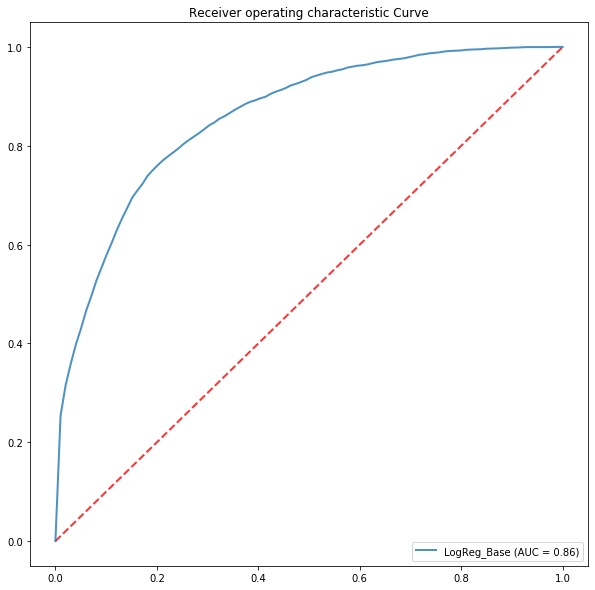

In [556]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize = (10, 10))
for i, (train, test) in enumerate(crossvalidation.split(X_train2, y_train2)):
    X_train_over, y_train_over = smote.fit_sample(X_train2.iloc[train], y_train2.iloc[train]) 
    lf = forest.fit(X_train_over, y_train_over)
    probas_ = lf.predict_proba(X_train2.iloc[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_train2.iloc[test], probas_[:, 1])
    interp_tpr = interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(auc(fpr, tpr))

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr,
        label=r'LogReg_Base (AUC = %0.2f)' % (mean_auc),
        lw=2, alpha=.8)


ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic Curve")
ax.legend(loc="lower right")
plt.show()

In [508]:
# Mean scores
dt_gs_training_accuracy_2 =  np.mean(tree_grid_search_2.cv_results_['mean_train_accuracy'])
dt_gs_validation_accuracy_2 =  np.mean(tree_grid_search_2.cv_results_['mean_test_accuracy'])

dt_gs_training_auc_2 =  np.mean(tree_grid_search_2.cv_results_['mean_train_roc_auc'])
dt_gs_validation_auc_2 =  np.mean(tree_grid_search_2.cv_results_['mean_test_roc_auc'])



#   Best Parameter Combination
dt_gs_best_params_2 = tree_grid_search_2.best_params_

print(f"Mean Training Accuracy: {dt_gs_training_accuracy_2 :.2%}")
print(f"Mean validation Accuracy: {dt_gs_validation_accuracy_2 :.2%}")
print(f"Mean Training AUC: {dt_gs_training_auc_2 :.2%}")
print(f"Mean validation AUC: {dt_gs_validation_auc_2 :.2%}")
print("Best Parameter Combination Found During Grid Search\n", dt_gs_best_params_2)

Mean Training Accuracy: 76.12%
Mean validation Accuracy: 74.60%
Mean Training AUC: 83.94%
Mean validation AUC: 81.61%
Best Parameter Combination Found During Grid Search
 {'classification__max_depth': 11}


In [159]:
rf_clf = RandomForestClassifier()

In [562]:
steps = [('sampling', smote), \
         ('classification', rf_clf)]

In [563]:
rf_param_grid = {"classification__n_estimators": [10, 30, 100],
                 "classification__criterion": ["gini", "entropy"],
                 #"classification__max_depth": [None, 2, 6, 10],
                 #"classification__min_samples_split": [5, 10],
                 "classification__min_samples_leaf": [3, 6]}

In [564]:
pipeline = Pipeline(steps = steps)

In [565]:
rf_grid_search = GridSearchCV(pipeline, rf_param_grid, cv = crossvalidation, return_train_score=True, scoring = ['accuracy', 'roc_auc'], refit = 'accuracy')

In [566]:
%%time
rf_grid_search.fit(X_train2, y_train2)

CPU times: user 2min 15s, sys: 3.49 s, total: 2min 18s
Wall time: 2min 23s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('sampling',
                                        SMOTE(k_neighbors=5, n_jobs=None,
                                              random_state=None,
                                              sampling_strategy='auto')),
                                       ('classification',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='a...
                                              

In [568]:
print(f"Optimal Parameters: {rf_grid_search.best_params_}")
rf_score_train = np.mean(rf_grid_search.cv_results_['mean_train_accuracy'])
rf_score_val = np.mean(rf_grid_search.cv_results_['mean_test_accuracy'])

print('Random forest grid search train accuracy: ', rf_score_train)
print('Random forest grid search validation accuracy: ', rf_score_val)

Optimal Parameters: {'classification__criterion': 'gini', 'classification__min_samples_leaf': 3, 'classification__n_estimators': 100}
Random forest grid search train accuracy:  0.9078024686185399
Random forest grid search validation accuracy:  0.8355062165065689


In [164]:
# OVERFIT

In [569]:
rf_grid_search.score(X_val2, y_val2)

0.8485397055273957

In [572]:
rf_param_grid_2 = {"classification__n_estimators": [10, 30, 100],
                 "classification__criterion": ["gini", "entropy"],
                 #"classification__max_depth": [None, 2, 6, 10],
                 #"classification__min_samples_split": [5, 10],
                 "classification__min_samples_leaf": [5, 6, 7]}

In [573]:
pipeline = Pipeline(steps = steps)

In [574]:
rf_grid_search_2 = GridSearchCV(pipeline, rf_param_grid_2, cv = crossvalidation, return_train_score=True, scoring = ['accuracy', 'roc_auc'], refit = 'accuracy')

In [575]:
%%time
rf_grid_search_2.fit(X_train2, y_train2)

CPU times: user 3min 25s, sys: 5.63 s, total: 3min 31s
Wall time: 3min 48s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('sampling',
                                        SMOTE(k_neighbors=5, n_jobs=None,
                                              random_state=None,
                                              sampling_strategy='auto')),
                                       ('classification',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='a...
                                              

In [576]:
rf_grid_search_2.cv_results_

{'mean_fit_time': array([0.71530342, 1.16145678, 3.33564162, 0.56027246, 1.09852223,
        3.45550642, 1.51648564, 2.78447542, 5.6164629 , 1.12526045,
        2.07747164, 3.7885488 , 0.53095546, 1.05637379, 3.1340589 ,
        0.50881324, 1.03304677, 2.85462093]),
 'std_fit_time': array([0.14172909, 0.0757239 , 0.20091523, 0.075345  , 0.04500168,
        0.4588242 , 0.27438817, 0.77068875, 0.48106544, 0.10899532,
        0.51092569, 0.88832588, 0.00752062, 0.01219075, 0.36902104,
        0.01222531, 0.01139211, 0.08913062]),
 'mean_score_time': array([0.032199  , 0.05539422, 0.16928153, 0.02352223, 0.04885511,
        0.13750181, 0.07941918, 0.10984802, 0.34399781, 0.05739999,
        0.07935324, 0.17765455, 0.02045393, 0.04604101, 0.14973106,
        0.02079964, 0.04555044, 0.13799968]),
 'std_score_time': array([0.00247315, 0.00419528, 0.04229845, 0.00209421, 0.00104624,
        0.00299965, 0.04672915, 0.03860406, 0.06511259, 0.01375047,
        0.02065373, 0.05010567, 0.00065367, 

In [578]:
print(f"Optimal Parameters: {rf_grid_search_2.best_params_}")
rf2_accuracy_train = np.mean(rf_grid_search_2.cv_results_['mean_train_accuracy'])
rf2_accuracy_val = np.mean(rf_grid_search_2.cv_results_['mean_test_accuracy'])

rf2_auc_train = np.mean(rf_grid_search_2.cv_results_['mean_train_roc_auc'])
rf2_auc_val = np.mean(rf_grid_search_2.cv_results_['mean_test_roc_auc'])

print('Random forest grid search train accuracy: ', rf2_accuracy_train)
print('Random forest grid search validation accuracy: ', rf2_accuracy_val)
print('Random forest grid search train auc: ', rf2_auc_train)
print('Random forest grid search validation auc: ', rf2_auc_val)

Optimal Parameters: {'classification__criterion': 'entropy', 'classification__min_samples_leaf': 5, 'classification__n_estimators': 100}
Random forest grid search train accuracy:  0.8880561910449756
Random forest grid search validation accuracy:  0.8331524497229614
Random forest grid search train auc:  0.9533850316823617
Random forest grid search validation auc:  0.8874863217514058


In [580]:
#OVERFIT

In [581]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [582]:
adaboost_clf = AdaBoostClassifier(random_state = 42)

In [583]:
adaboost_clf_base = cross_validate(adaboost_clf, X_train2, y_train2, scoring=['accuracy', 'roc_auc'], cv=crossvalidation, return_train_score = True)

In [584]:
adaboost_clf_base.keys()

dict_keys(['fit_time', 'score_time', 'test_accuracy', 'train_accuracy', 'test_roc_auc', 'train_roc_auc'])

In [585]:
# Mean training score
adaboost_clf_base_training_score =  np.mean(adaboost_clf_base['train_accuracy'])
adaboost_clf_base_validation_score =  np.mean(adaboost_clf_base['test_accuracy'])

print(f"Mean Training Score: {adaboost_clf_base_training_score :.2%}")
print(f"Mean Test Score: {adaboost_clf_base_validation_score :.2%}")

adaboost_clf_base_training_roc_auc =  np.mean(adaboost_clf_base['train_roc_auc'])
adaboost_clf_base_validation_roc_auc =  np.mean(adaboost_clf_base['test_roc_auc'])

print(f"Mean Training AUC: {adaboost_clf_base_training_roc_auc :.2%}")
print(f"Mean Test AUC: {adaboost_clf_base_validation_roc_auc :.2%}")

Mean Training Score: 82.03%
Mean Test Score: 81.73%
Mean Training AUC: 87.56%
Mean Test AUC: 87.08%


In [586]:
adaboost_clf.fit(X_train2, y_train2)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=42)

In [587]:
adaboost_clf_preds = adaboost_clf.predict_proba(X_val2)

In [588]:
fpr_ada, tpr_ada, th_ada = roc_curve(y_val2, adaboost_clf_preds[:,1])

In [589]:
auc(fpr_ada, tpr_ada)

0.8649769427128715

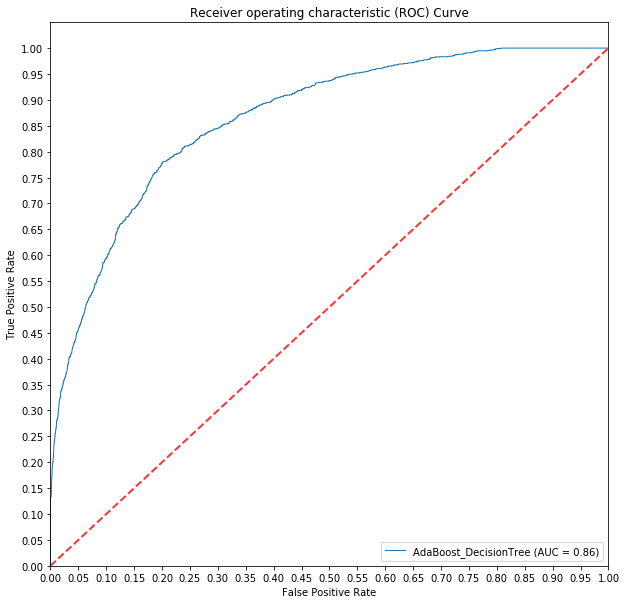

In [590]:
fig, ax = plt.subplots(figsize = (10, 10))
plot_roc_curve(adaboost_clf, X_val2, y_val2,
                         name='AdaBoost_DecisionTree',
                         lw=1, ax=ax)
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_yticks([i/20.0 for i in range(21)])
ax.set_xticks([i/20.0 for i in range(21)])
ax.set_title('Receiver operating characteristic (ROC) Curve')
ax.legend(loc='lower right')
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

In [591]:
gradboost_clf = GradientBoostingClassifier(random_state = 42)

In [592]:
gradboost_clf_base = cross_validate(gradboost_clf, X_train2, y_train2, scoring=['accuracy', 'roc_auc'], cv=crossvalidation, return_train_score = True)

In [593]:
# Mean training score
gradboost_clf_base_training_score =  np.mean(gradboost_clf_base['train_accuracy'])
gradboost_clf_base_validation_score =  np.mean(gradboost_clf_base['test_accuracy'])

print(f"Mean Training Score: {gradboost_clf_base_training_score :.2%}")
print(f"Mean Validation Score: {gradboost_clf_base_validation_score :.2%}")

gradboost_clf_base_training_roc_auc =  np.mean(gradboost_clf_base['train_roc_auc'])
gradboost_clf_base_validation_roc_auc =  np.mean(gradboost_clf_base['test_roc_auc'])

print(f"Mean Training AUC: {gradboost_clf_base_training_roc_auc :.2%}")
print(f"Mean Validation AUC: {gradboost_clf_base_validation_roc_auc :.2%}")

Mean Training Score: 82.94%
Mean Validation Score: 82.39%
Mean Training AUC: 89.22%
Mean Validation AUC: 88.21%


In [594]:
gradboost_clf.fit(X_train2, y_train2)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [595]:
gradboost_train_preds = gradboost_clf.predict_proba(X_val2)

In [596]:
fpr_grad, tpr_grad, th_grad = roc_curve(y_val2, gradboost_train_preds[:,1])

In [597]:
auc(fpr_grad, tpr_grad)

0.8818306460238272

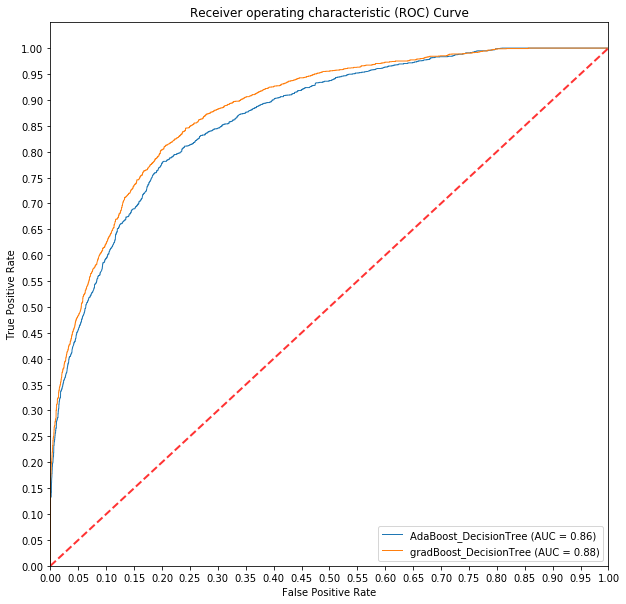

In [598]:
fig, ax = plt.subplots(figsize = (10, 10))
plot_roc_curve(adaboost_clf, X_val2, y_val2,
                         name='AdaBoost_DecisionTree',
                         lw=1, ax=ax)
plot_roc_curve(gradboost_clf, X_val2, y_val2,
                         name='gradBoost_DecisionTree',
                         lw=1, ax=ax)
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_yticks([i/20.0 for i in range(21)])
ax.set_xticks([i/20.0 for i in range(21)])
ax.set_title('Receiver operating characteristic (ROC) Curve')
ax.legend(loc='lower right')
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

In [599]:
from xgboost import XGBClassifier

In [600]:
xgb_clf = XGBClassifier()

In [601]:
xgb_clf_base = cross_validate(xgb_clf, X_train2, y_train2, scoring=['accuracy', 'roc_auc'], cv=crossvalidation, return_train_score = True)

In [602]:
# Mean training score
xgb_clf_base_training_score =  np.mean(xgb_clf_base['train_accuracy'])
xgb_clf_base_validation_score =  np.mean(xgb_clf_base['test_accuracy'])

print(f"Mean Training Score: {xgb_clf_base_training_score :.2%}")
print(f"Mean Validation Score: {xgb_clf_base_validation_score :.2%}")

xgb_clf_base_training_roc_auc =  np.mean(xgb_clf_base['train_roc_auc'])
xgb_clf_base_validation_roc_auc =  np.mean(xgb_clf_base['test_roc_auc'])

print(f"Mean Training AUC: {xgb_clf_base_training_roc_auc :.2%}")
print(f"Mean Validation AUC: {xgb_clf_base_validation_roc_auc :.2%}")

Mean Training Score: 82.60%
Mean Validation Score: 82.22%
Mean Training AUC: 88.78%
Mean Validation AUC: 88.07%


In [603]:
xgb_clf.fit(X_train2, y_train2)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [604]:
xgb_train_preds = xgb_clf.predict_proba(X_val2)

In [605]:
fpr_xgb, tpr_xgb, th_xgb = roc_curve(y_val2, xgb_train_preds[:,1])

In [606]:
auc(fpr_xgb, tpr_xgb)

0.8803602215164114

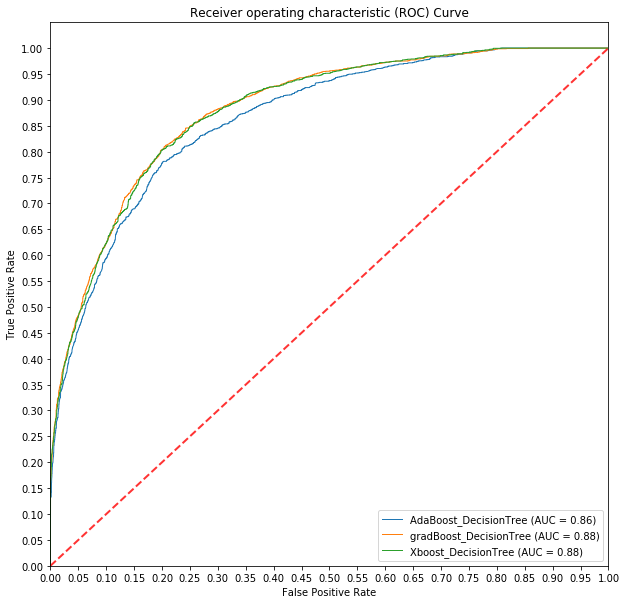

In [607]:
fig, ax = plt.subplots(figsize = (10, 10))

plot_roc_curve(adaboost_clf, X_val2, y_val2,
                         name='AdaBoost_DecisionTree',
                         lw=1, ax=ax)
plot_roc_curve(gradboost_clf, X_val2, y_val2,
                         name='gradBoost_DecisionTree',
                         lw=1, ax=ax)
plot_roc_curve(xgb_clf, X_val2, y_val2,
                         name='Xboost_DecisionTree',
                         lw=1, ax=ax)
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_yticks([i/20.0 for i in range(21)])
ax.set_xticks([i/20.0 for i in range(21)])
ax.set_title('Receiver operating characteristic (ROC) Curve')
ax.legend(loc='lower right')
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

In [ ]:
param_grid_xgb = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [4, 5, 6, 7],
    #'min_child_weight': [1, 2, 3, 4],
    'subsample': [0.8, 0.9, 1.0],
    'n_estimators': [100],
}

In [ ]:
grid_xgb = GridSearchCV(xgb_clf, param_grid_xgb, scoring = 'accuracy', cv = crossvalidation, n_jobs = 1, return_train_score = True)

In [ ]:
%%time
grid_xgb.fit(X_train2, y_train2)

In [ ]:
grid_xgb.best_params_

In [ ]:
xgb_clf_2 = XGBClassifier(learning_rate = 0.1, max_depth = 7, n_estimators = 100, subsample = 0.8)

In [ ]:
xgb_clf_2_cv = cross_validate(xgb_clf_2, X_train2, y_train2, scoring=['accuracy', 'roc_auc'], cv=crossvalidation, return_train_score = True)

In [ ]:
# Mean training score
xgb_clf_2_cv_training_score =  np.mean(xgb_clf_2_cv['train_accuracy'])
xgb_clf_2_cv_validation_score =  np.mean(xgb_clf_2_cv['test_accuracy'])

print(f"Mean Training Score: {xgb_clf_2_cv_training_score :.2%}")
print(f"Mean Validation Score: {xgb_clf_2_cv_validation_score :.2%}")

xgb_clf_2_cv_training_roc_auc =  np.mean(xgb_clf_2_cv['train_roc_auc'])
xgb_clf_2_cv_validation_roc_auc =  np.mean(xgb_clf_2_cv['test_roc_auc'])

print(f"Mean Training AUC: {xgb_clf_2_cv_training_roc_auc :.2%}")
print(f"Mean Validation AUC: {xgb_clf_2_cv_validation_roc_auc :.2%}")

In [ ]:
xgb_clf_2.fit(X_train2, y_train2)

In [ ]:
xgb_clf_2_train_preds = xgb_clf_2.predict_proba(X_val2)

In [ ]:
fpr_xgb_clf_2, tpr_xgb_clf_2, th_xgb_clf_2 = roc_curve(y_val2, xgb_clf_2_train_preds[:,1])

In [ ]:
auc(fpr_xgb_clf_2, tpr_xgb_clf_2)

In [ ]:
fig, ax = plt.subplots(figsize = (10, 10))

plot_roc_curve(adaboost_clf, X_val2, y_val2,
                         name='AdaBoost_DecisionTree',
                         lw=1, ax=ax)
plot_roc_curve(gradboost_clf, X_val2, y_val2,
                         name='gradBoost_DecisionTree',
                         lw=1, ax=ax)
plot_roc_curve(xgb_clf, X_val2, y_val2,
                         name='Xboost_DecisionTree',
                         lw=1, ax=ax)
plot_roc_curve(xgb_clf_2, X_val2, y_val2,
                         name='Xboost_DecisionTree',
                         lw=1, ax=ax)
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_yticks([i/20.0 for i in range(21)])
ax.set_xticks([i/20.0 for i in range(21)])
ax.set_title('Receiver operating characteristic (ROC) Curve')
ax.legend(loc='lower right')
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

SVC

In [608]:
from sklearn.svm import SVC

In [609]:
svclassifier = SVC(kernel='linear', probability=True)  
svclassifier.fit(X_train2, y_train2)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [610]:
svc_pred = svclassifier.predict(X_val2)

In [611]:
from sklearn.metrics import classification_report, confusion_matrix

In [612]:
print(confusion_matrix(y_val2,svc_pred))  
print(classification_report(y_val2,svc_pred)) 
print("The accuracy score is" + " "+ str(accuracy_score(y_val2,svc_pred)))

[[5602  403]
 [1192 1089]]
              precision    recall  f1-score   support

           0       0.82      0.93      0.88      6005
           1       0.73      0.48      0.58      2281

    accuracy                           0.81      8286
   macro avg       0.78      0.71      0.73      8286
weighted avg       0.80      0.81      0.79      8286

The accuracy score is 0.8075066377021483


In [619]:
svc_train_preds = svclassifier.predict_proba(X_val2)

In [620]:
fpr_svc, tpr_svc, th__svc = roc_curve(y_val2, svc_train_preds[:,1])

In [621]:
auc(fpr_svc, tpr_svc)

0.8385473014779077

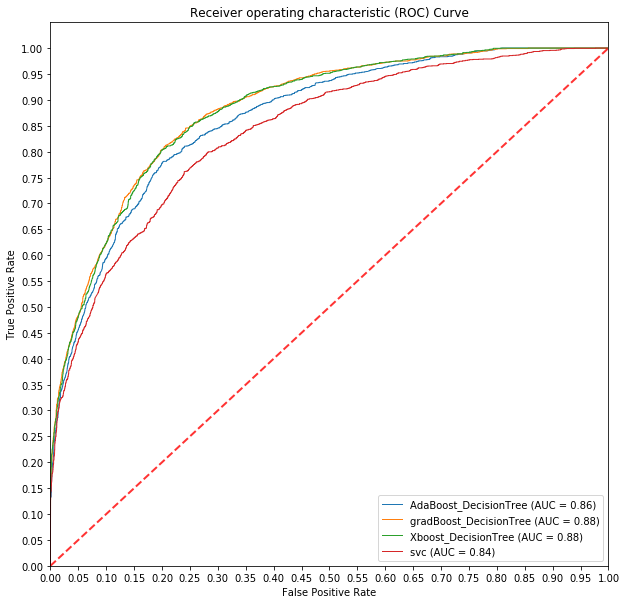

In [623]:
fig, ax = plt.subplots(figsize = (10, 10))

plot_roc_curve(adaboost_clf, X_val2, y_val2,
                         name='AdaBoost_DecisionTree',
                         lw=1, ax=ax)
plot_roc_curve(gradboost_clf, X_val2, y_val2,
                         name='gradBoost_DecisionTree',
                         lw=1, ax=ax)
plot_roc_curve(xgb_clf, X_val2, y_val2,
                         name='Xboost_DecisionTree',
                         lw=1, ax=ax)
plot_roc_curve(xgb_clf_2, X_val2, y_val2,
                         name='Xboost_GridSearch_DecisionTree',
                         lw=1, ax=ax),
plot_roc_curve(svclassifier, X_val2, y_val2,
                         name='svc',
                         lw=1, ax=ax)
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_yticks([i/20.0 for i in range(21)])
ax.set_xticks([i/20.0 for i in range(21)])
ax.set_title('Receiver operating characteristic (ROC) Curve')
ax.legend(loc='lower right')
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

In [624]:
r_range =  np.array([0.1, 2])
gamma_range =  np.array([0.1, 1])
d_range = np.array([3, 4])
param_grid_svc_poly = dict(gamma=gamma_range, degree=d_range, coef0=r_range)

In [625]:
svc_poly = SVC(kernel='poly', probability=True)  

In [626]:
grid_svc_poly = GridSearchCV(svc_poly, param_grid_svc_poly, scoring = 'accuracy', cv = crossvalidation, n_jobs = 1, return_train_score = True)

In [ ]:
%%time
grid_svc_poly.fit(X_train2, y_train2)

In [ ]:
grid_svc_poly.best_params_

In [ ]:
XGBOOST, SVC